# Create convolutional neural network model

## Imports

In [1]:
from tflearn import DNN
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
from tflearn.data_utils import image_preloader

## Get dataset

image shape:  (120, 160, 3) Features:  7


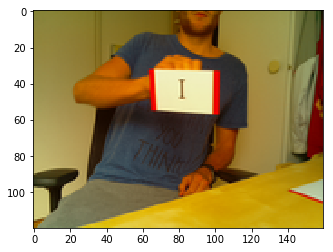

In [2]:
# Load path/class_id image file:
data_folder = '../images/final_dataset'

# Build the preloader array, resize images to 160 x 120
X, Y = image_preloader(data_folder, image_shape=(160, 120), mode='folder', categorical_labels=True, normalize=True, files_extension=['.jpg'])

# Show shape and features
print("image shape: ", X[0].shape, "Features: ", len(Y[0]))

from matplotlib.pyplot import imshow
%matplotlib inline

imshow(X[0])

### Image augmentation
We use image augmentation to create a better training effect for real world situations. We randomly blur images and rotate them.

In [3]:
# Real-time data augmentation (This is only used while training the DNN)
img_aug = ImageAugmentation()
img_aug.add_random_blur(0.20)
img_aug.add_random_rotation(max_angle=10.0)

### Image preprocessing

In [4]:
# Real-time data preprocessing
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

### Convolutional neural network model

In [5]:
# Convolutional network building
network = input_data(shape=[None, 120, 160, 3],
                     data_augmentation=img_aug,
                    data_preprocessing=img_prep)
network = conv_2d(network, 16, 7, activation='relu', name="conv2d-1")
network = max_pool_2d(network, 2)
network = conv_2d(network, 32, 5, activation='relu', name="conv2d-2")
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu', name="conv2d-3")
network = max_pool_2d(network, 2)
network = fully_connected(network, 128, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 7, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

model = DNN(network, tensorboard_verbose=0)

### Train the model and save it

In [6]:
model.load('../models/final_model_4_160/final_model_4_160')

# Start the trainig process
model.fit(X, Y, n_epoch=20, shuffle=True, validation_set=0.2, show_metric=True, batch_size=128, validation_batch_size=128, run_id='final_model_4_160')

# Evaluate performance on test set
#model.evaluate(X_test, Y_test)

# Save the model
model.save('../models/final_model_4_160/final_model_4_160')

# Close the database connection
#h5f.close()

Training Step: 1799  | total loss: 0.07606 | time: 39.918s
| Adam | epoch: 020 | loss: 0.07606 - acc: 0.9721 -- iter: 3712/3816
Training Step: 1800  | total loss: 0.08170 | time: 51.626s
| Adam | epoch: 020 | loss: 0.08170 - acc: 0.9694 | val_loss: 0.08983 - val_acc: 0.9654 -- iter: 3816/3816
--
INFO:tensorflow:/home/rens/pren/models/final_model_4_160/final_model_4_160 is not in all_model_checkpoint_paths. Manually adding it.
